<a href="https://colab.research.google.com/github/Bayrkdartech/My-colab-project/blob/main/Practic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: diabetes.csv            
Glucose: 5 invalid (zero) values
BloodPressure: 35 invalid (zero) values
SkinThickness: 227 invalid (zero) values
Insulin: 374 invalid (zero) values
BMI: 11 invalid (zero) values
Glucose now has 0 zero values
BloodPressure now has 0 zero values
SkinThickness now has 0 zero values
Insulin now has 0 zero values


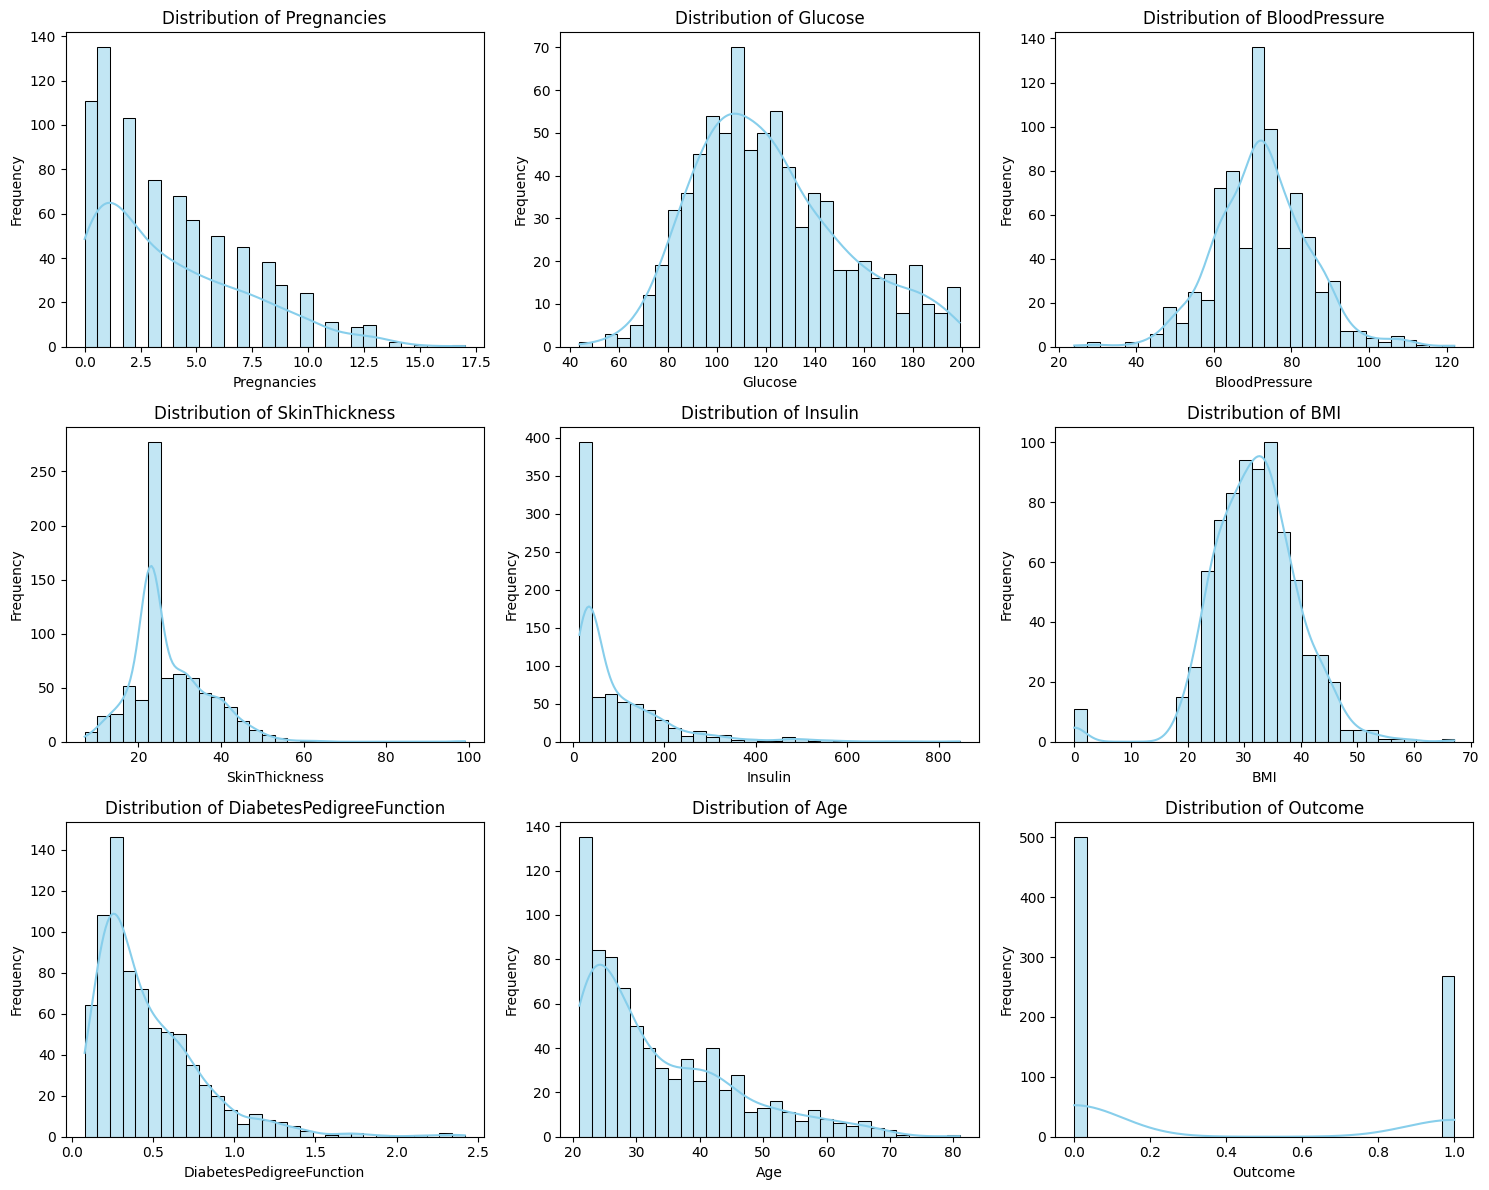

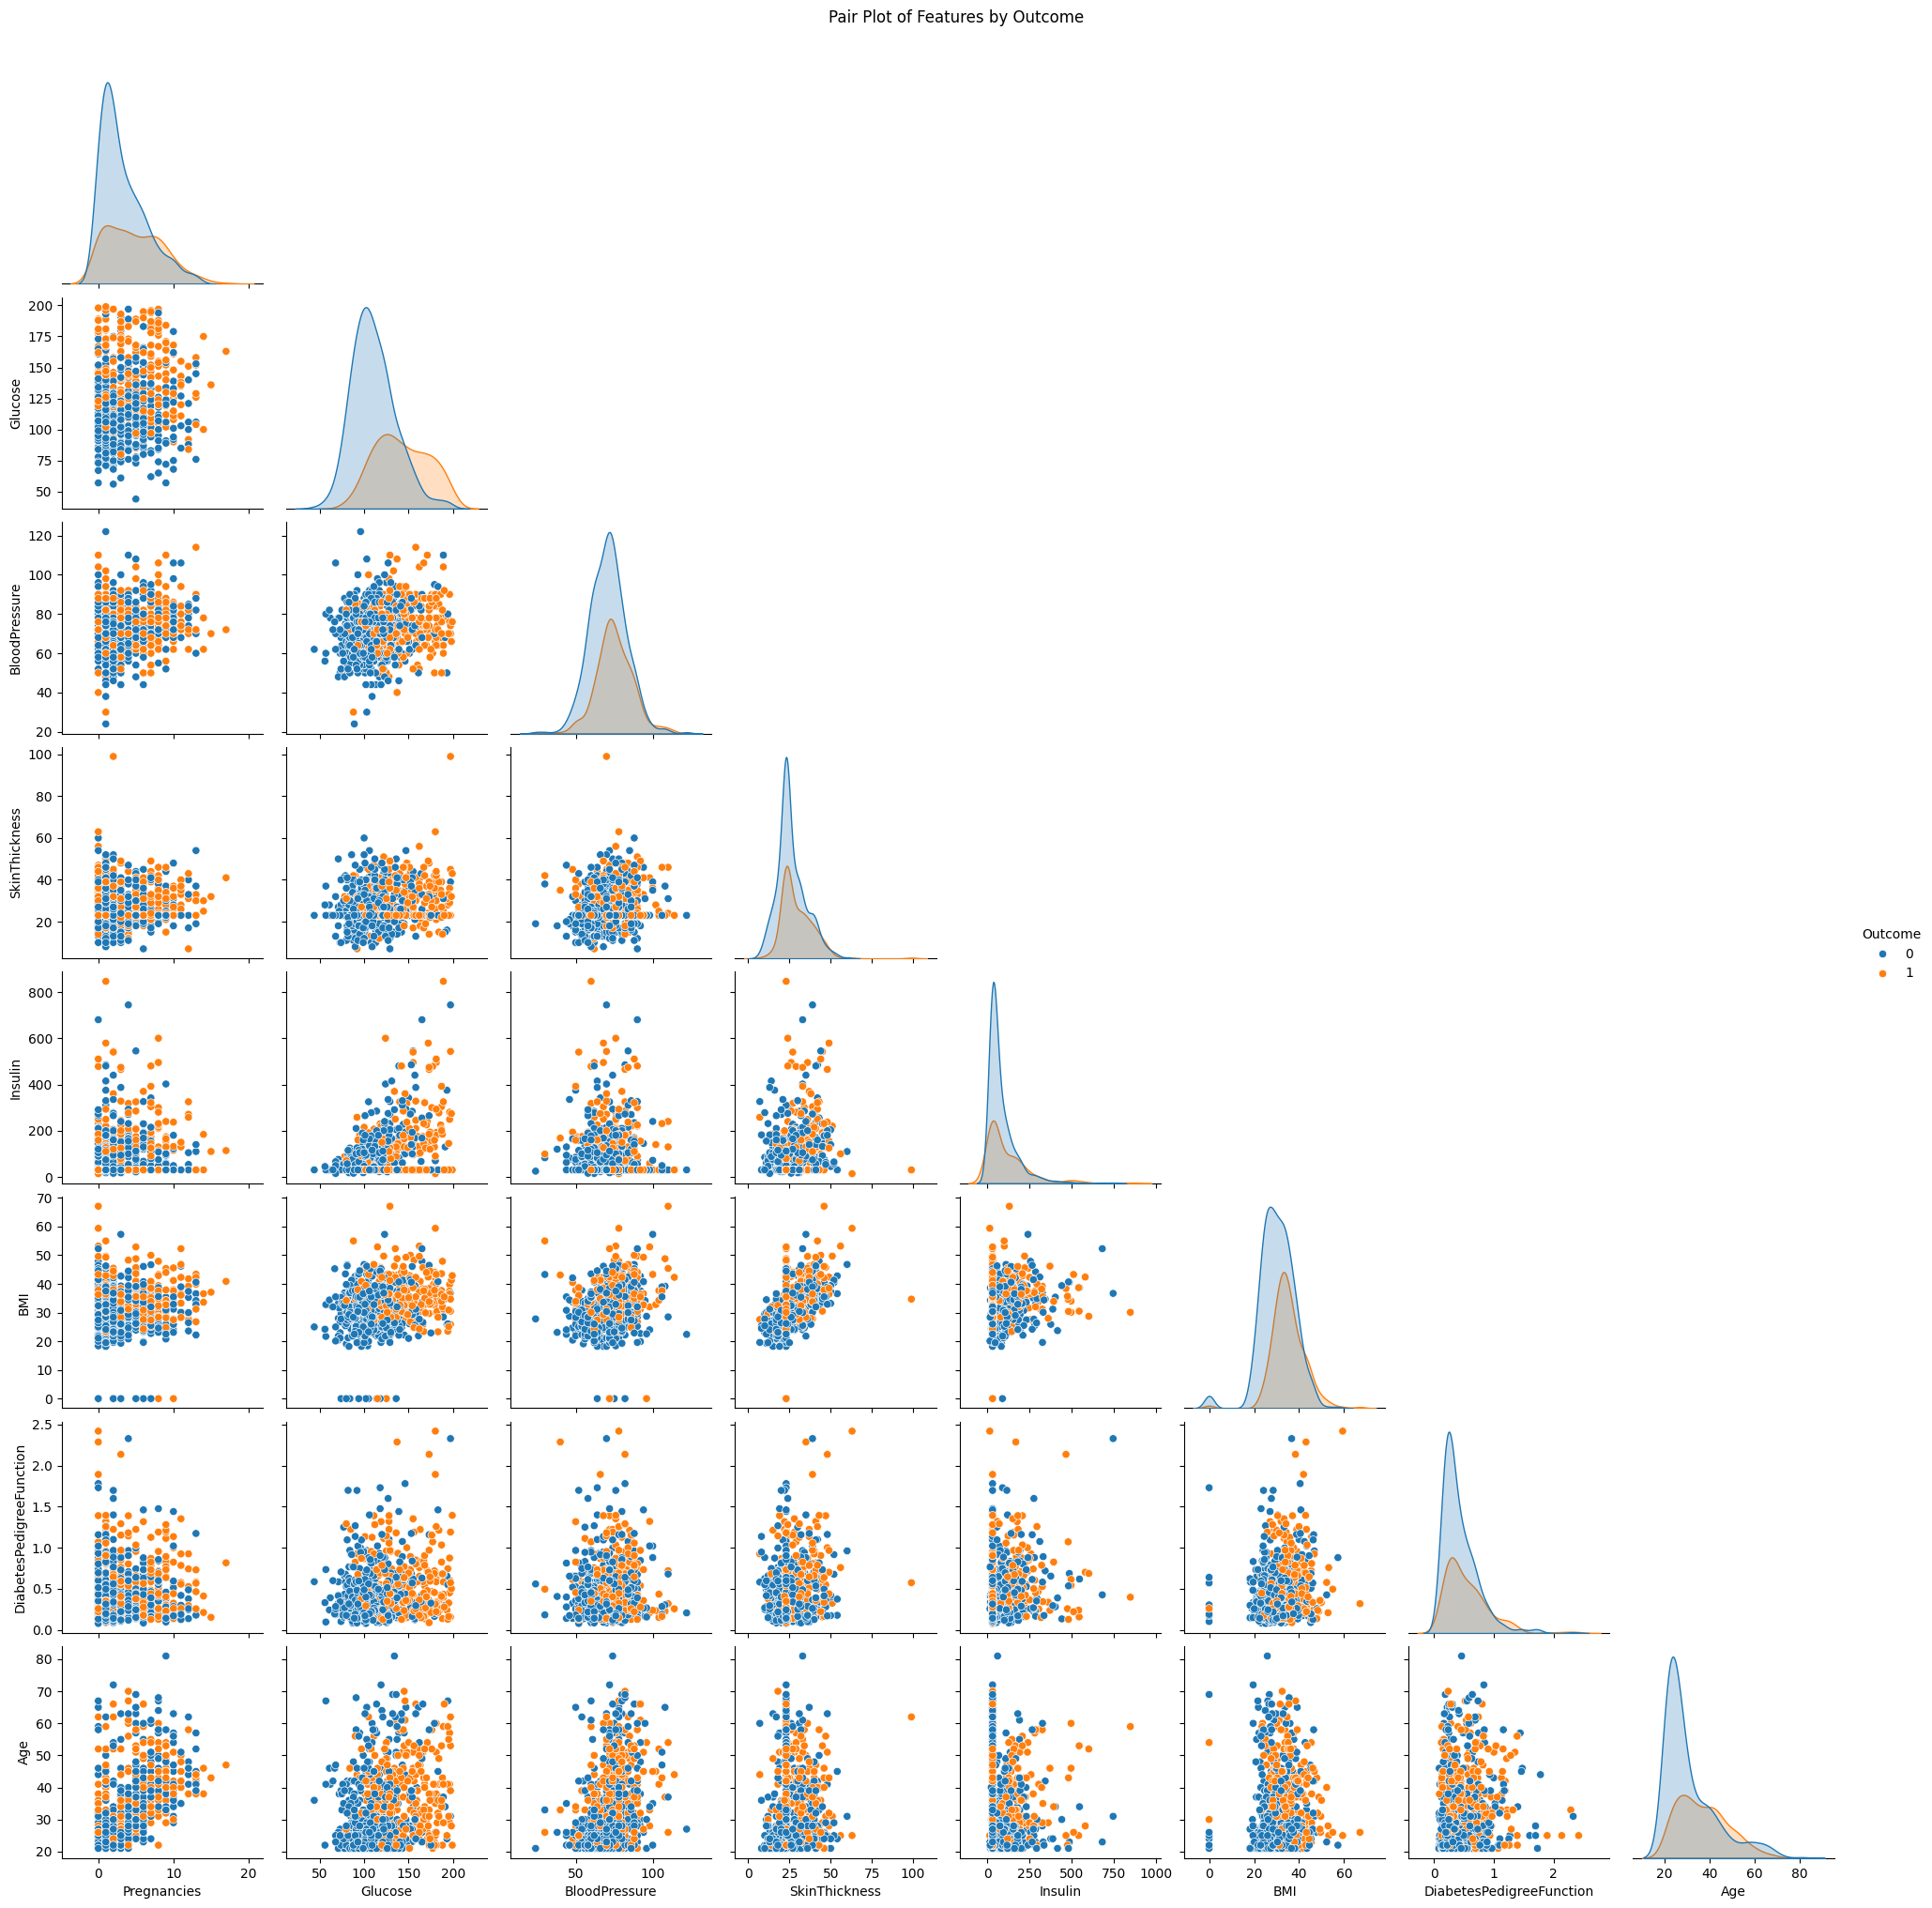

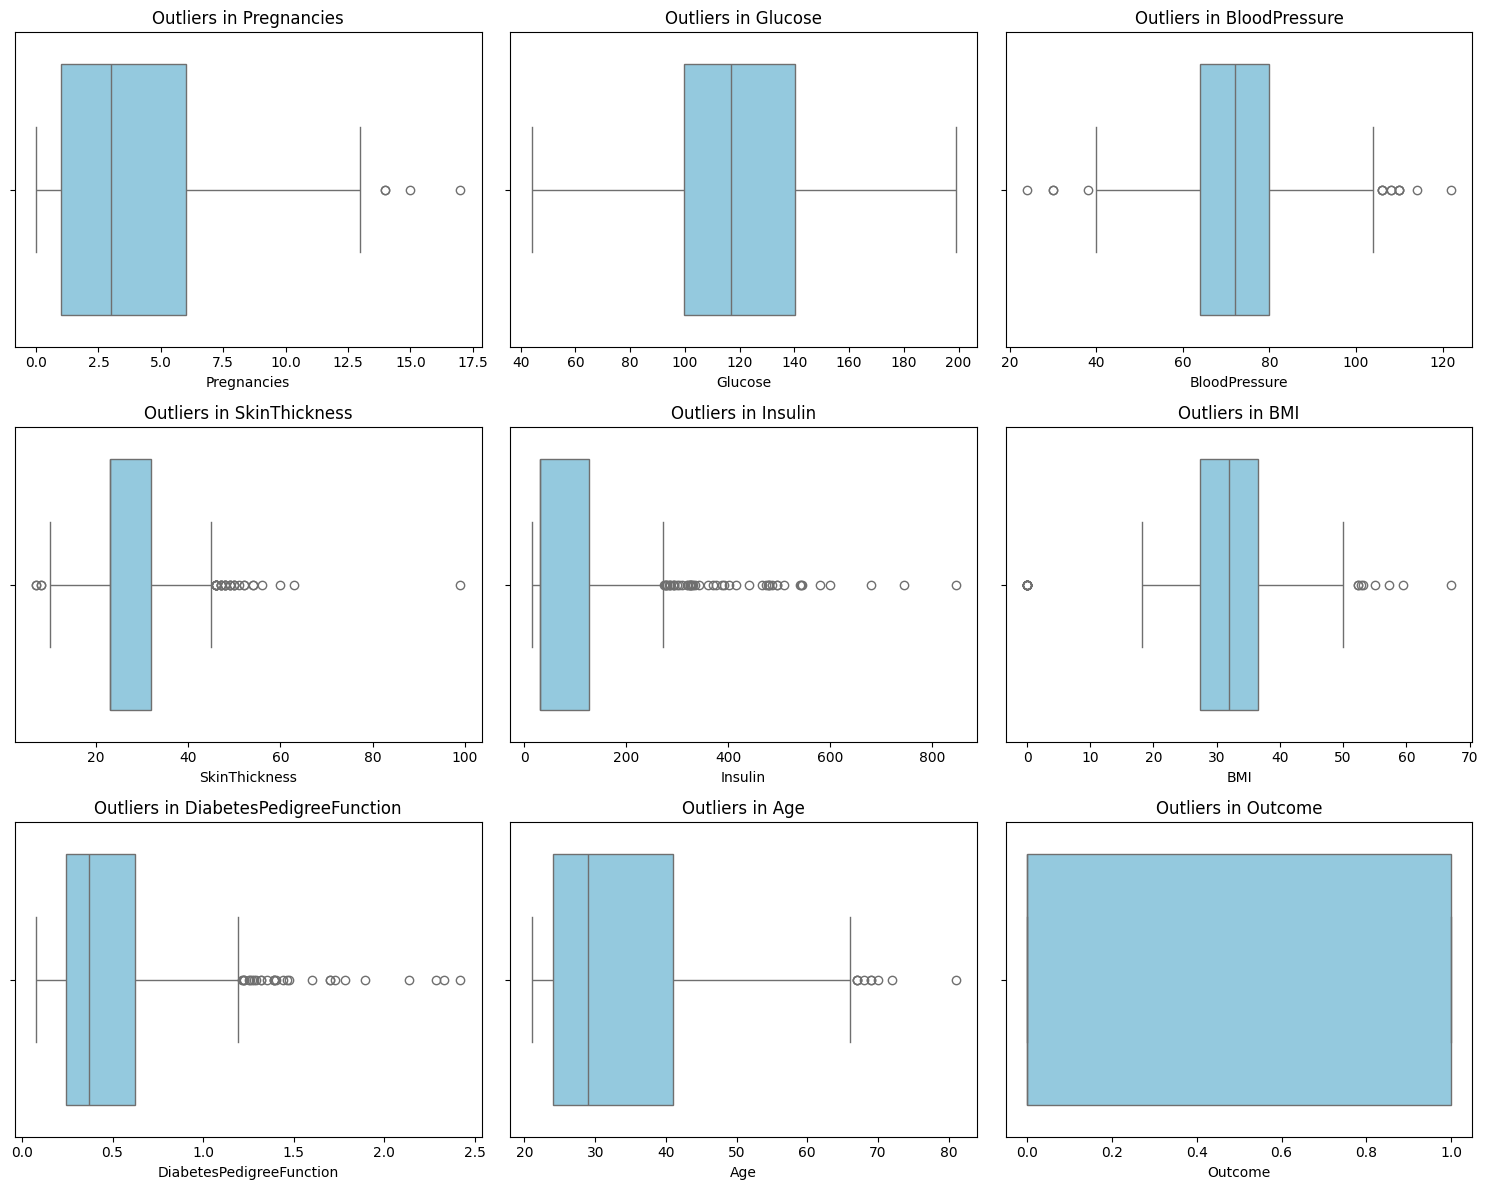

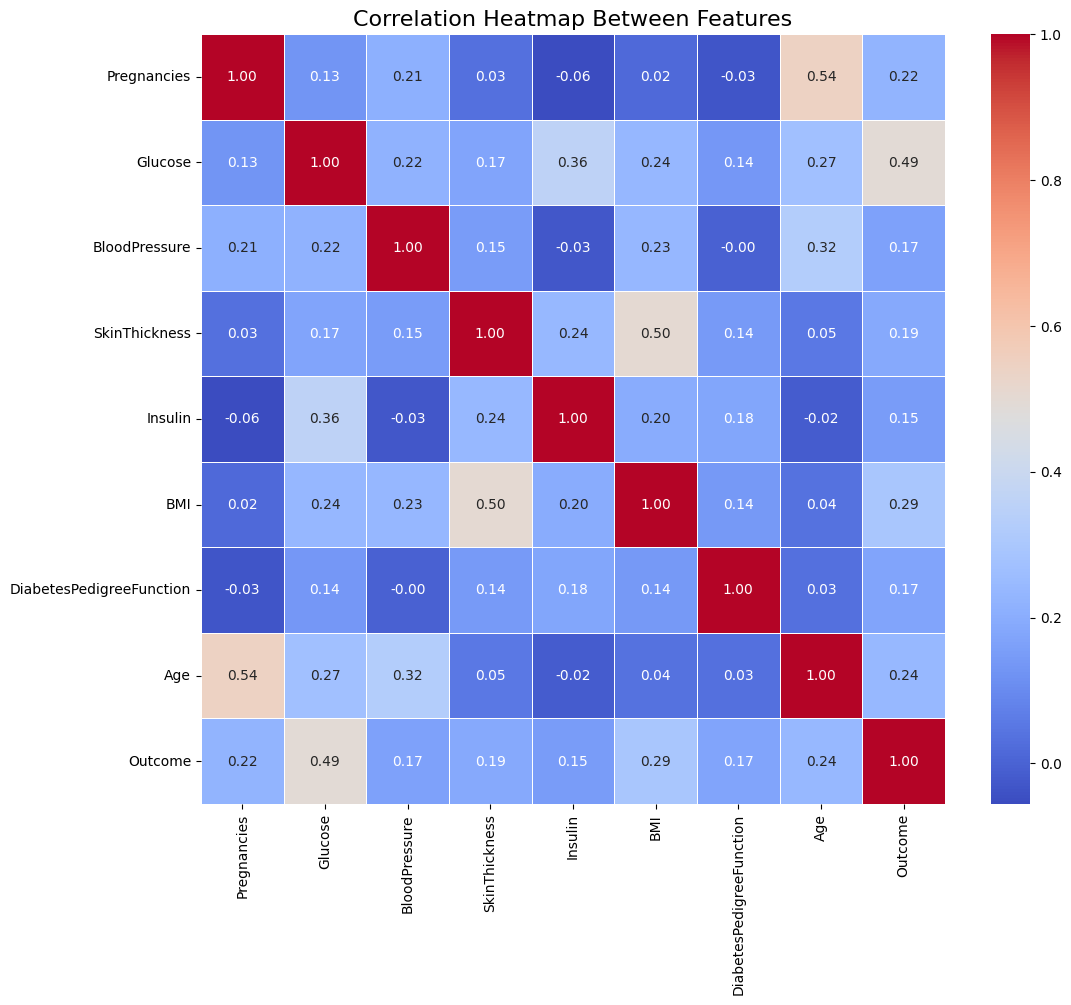

T-statistic: 15.674, p-value: 0.00000
✅ There is a significant difference in Glucose levels between diabetic and non-diabetic individuals.


In [14]:

# ---------------------------------------------
# 🧠 Project: Diabetes Data Analysis
# 👨‍⚕️ Dataset: Pima Indians Diabetes Dataset
# 📁 Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
# 🔍 Goal: Explore and analyze the dataset to find patterns and insights, especially differences between diabetic and non-diabetic individuals.
# ---------------------------------------------

# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from google.colab import drive
import os
import shutil

# ---------------------------------------------
# 📁 Load dataset from Kaggle (via Google Drive)
# ---------------------------------------------
drive.mount('/content/drive')

os.makedirs('/root/.kaggle', exist_ok=True)
shutil.copy('/content/drive/MyDrive/kaggle.json', '/root/.kaggle/kaggle.json')
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

# 📥 Read CSV file
df = pd.read_csv('diabetes.csv')
df.head()

# ---------------------------------------------
# 🧹 Data Cleaning
# ---------------------------------------------
# Identify columns with invalid zero values
cols_with_invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_invalid_zero:
    count = (df[col] == 0).sum()
    print(f'{col}: {count} invalid (zero) values')

# Replace invalid zeros with median (except for 'BMI' which seems fine)
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for col in cols_to_fix:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

# Check again
for col in cols_to_fix:
    print(f"{col} now has {(df[col]==0).sum()} zero values")

# ---------------------------------------------
# 📊 Exploratory Data Analysis (EDA)
# ---------------------------------------------

# 1. Distribution of all features
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

plt.figure(figsize=(15,12))
for i, col in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Pairplot by Outcome
sns.pairplot(df, vars=cols[:-1], hue='Outcome', corner=True)
plt.suptitle("Pair Plot of Features by Outcome", y=1.02)
plt.show()

# 3. Boxplots to detect outliers
plt.figure(figsize=(15,12))
for i, col in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outliers in {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 4. Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Between Features", fontsize=16)
plt.show()

# ---------------------------------------------
# 📈 Statistical Analysis
# ---------------------------------------------
# Compare average glucose level between diabetic and non-diabetic
group_diabetic = df[df['Outcome'] == 1]['Glucose']
group_nondiabetic = df[df['Outcome'] == 0]['Glucose']

t_stat, p_value = ttest_ind(group_diabetic, group_nondiabetic, equal_var=True)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")
if p_value < 0.05:
    print("✅ There is a significant difference in Glucose levels between diabetic and non-diabetic individuals.")
else:
    print("❌ No significant difference in Glucose levels.")

# ---------------------------------------------
# ✅ Conclusion
# ---------------------------------------------
# The analysis revealed differences in glucose levels between diabetic and non-diabetic individuals.
# Visual exploration highlighted several patterns, and further machine learning models could be built on this cleaned dataset.

from google.colab import drive
dribe.mount('/content/drive')